# ECO 다항 회귀 분석 프로젝트

이 노트북은 `2012년 ~ 2023년`의 에너지 사용량 데이터를 바탕으로  
**전기, 가스, 수도, 지역난방 사용량**을 입력 변수로 하여  
**탄소 배출량(현년 탄소)**을 예측하는 **2차 다항 회귀 분석**을 수행합니다.

분석 절차는 다음과 같습니다:
1. 데이터 통합 및 전처리
2. 다항 특성 생성
3. 다항 회귀 모델 학습
4. 모델 평가 (R², 회귀 계수)
5. 예측 결과 시각화

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 데이터 경로
data_dir = "./bulkdata"  # Jupyter notebook 기준 경로 설정
file_pattern = os.path.join(data_dir, "ECO_DATA_TOTAL_STATS_*.csv")

# 파일 불러오기
csv_files = sorted(glob.glob(file_pattern))
df = pd.concat([pd.read_csv(file, encoding='cp949') for file in csv_files], ignore_index=True)

# 사용할 열 선택 및 결측치 제거
cols = ['현년 전기사용량', '현년 가스사용량', '현년 수도사용량', '현년 지역난방 사용량', '현년 탄소']
df = df[cols].dropna()
df.head()


,현년 전기사용량,현년 가스사용량,현년 수도사용량,현년 지역난방 사용량,현년 탄소
0,0,0,0,0,0
1,0,565,2750,0,2179
2,0,280,0,0,627
3,22440,762,12502,0,15372
4,0,0,11693,0,3882


In [8]:
# X: 입력 변수, y: 예측할 목표 변수
X = df[['현년 전기사용량', '현년 가스사용량', '현년 수도사용량', '현년 지역난방 사용량']]
y = df['현년 탄소']

# 2차 다항 특성 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 특성 이름 확인
feature_names = poly.get_feature_names_out(X.columns)
pd.DataFrame(X_poly, columns=feature_names).head()


,현년 전기사용량,현년 가스사용량,현년 수도사용량,현년 지역난방 사용량,현년 전기사용량^2,현년 전기사용량 현년 가스사용량,현년 전기사용량 현년 수도사용량,현년 전기사용량 현년 지역난방 사용량,현년 가스사용량^2,현년 가스사용량 현년 수도사용량,현년 가스사용량 현년 지역난방 사용량,현년 수도사용량^2,현년 수도사용량 현년 지역난방 사용량,현년 지역난방 사용량^2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,565.0,2750.0,0.0,0.0,0.0,0.0,0.0,319225.0,1553750.0,0.0,7562500.0,0.0,0.0
2,0.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,78400.0,0.0,0.0,0.0,0.0,0.0
3,22440.0,762.0,12502.0,0.0,503553600.0,17099280.0,280544880.0,0.0,580644.0,9526524.0,0.0,156300004.0,0.0,0.0
4,0.0,0.0,11693.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136726249.0,0.0,0.0


In [9]:
# 학습용/테스트용 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R² Score (테스트셋): {r2:.4f}")
print("\n회귀 계수:")
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef:.4f}")


R² Score (테스트셋): 1.0000

회귀 계수:
현년 전기사용량: 0.4240
현년 가스사용량: 2.2400
현년 수도사용량: 0.3320
현년 지역난방 사용량: -0.0000
현년 전기사용량^2: 0.0000
현년 전기사용량 현년 가스사용량: 0.0000
현년 전기사용량 현년 수도사용량: -0.0000
현년 전기사용량 현년 지역난방 사용량: 0.0000
현년 가스사용량^2: -0.0000
현년 가스사용량 현년 수도사용량: 0.0000
현년 가스사용량 현년 지역난방 사용량: 0.0000
현년 수도사용량^2: 0.0000
현년 수도사용량 현년 지역난방 사용량: -0.0000
현년 지역난방 사용량^2: -0.0000


In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# Windows의 경우
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'

# 음수 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


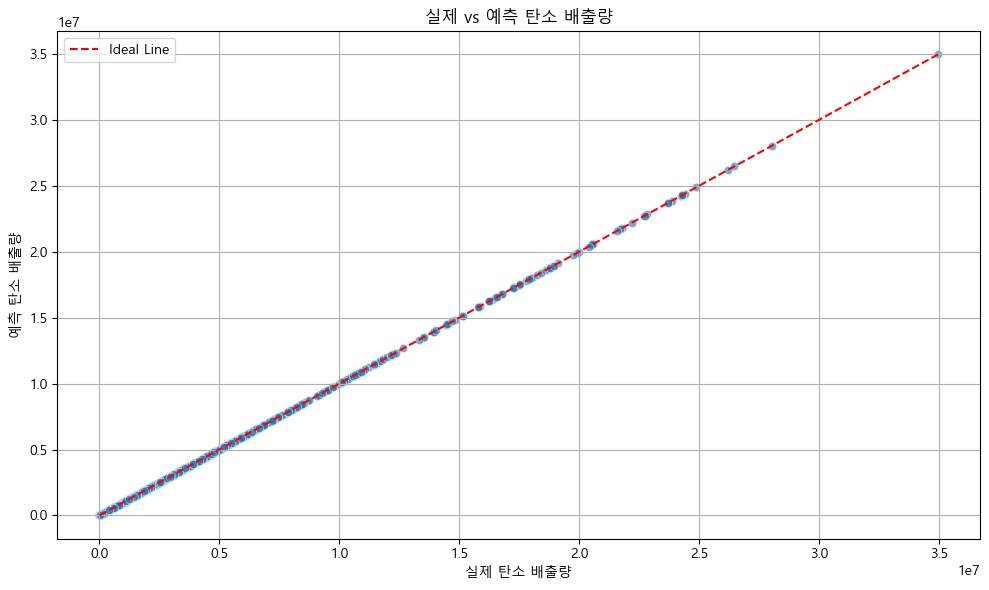

In [11]:
# 실제 vs 예측 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlabel('실제 탄소 배출량')
plt.ylabel('예측 탄소 배출량')
plt.title('실제 vs 예측 탄소 배출량')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
print(f"총 데이터 개수: {len(df):,}개")


총 데이터 개수: 515,371개


In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. 데이터 선택 및 결측치 제거
X = df[['현년 전기사용량']].dropna()
y = df.loc[X.index, '현년 탄소'].dropna()

# X, y 인덱스 정렬 일치
X = X.loc[y.index]
y = y.loc[X.index]

# 2. 다항 특성 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 3. 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 4. 예측 및 평가
y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)

print(f"[전기사용량 → 탄소] R² 점수: {r2:.4f}")
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)


[전기사용량 → 탄소] R² 점수: 0.9279
회귀 계수: [ 5.00054184e-01 -1.34219129e-09]
절편: 21211.773447902873


C:\Users\SSAFY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


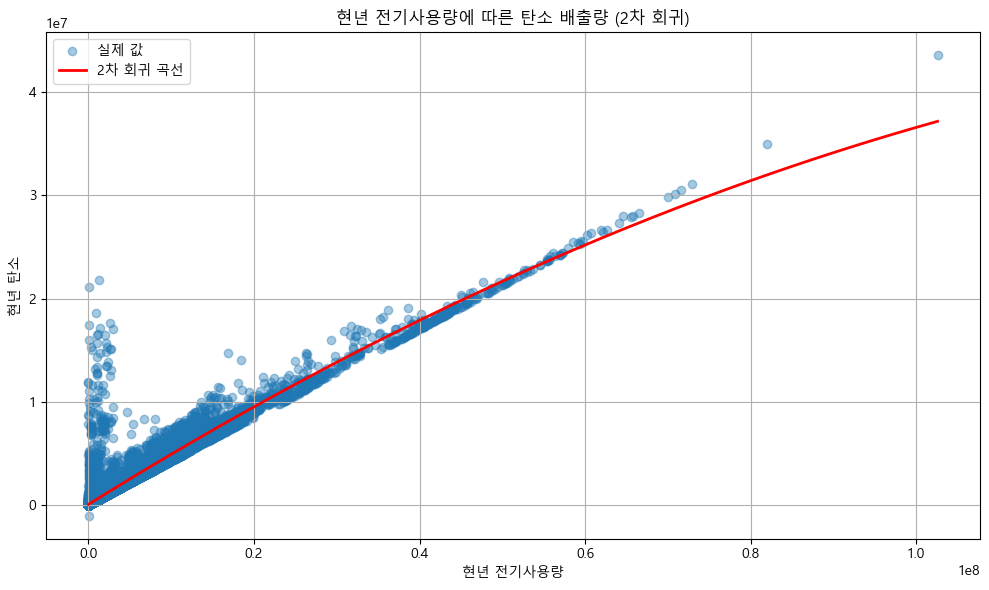

In [29]:
# 시각화를 위한 정렬된 값
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

# 한글 깨짐 방지 (Windows)
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.4, label='실제 값')
plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='2차 회귀 곡선')
plt.xlabel('현년 전기사용량')
plt.ylabel('현년 탄소')
plt.title('현년 전기사용량에 따른 탄소 배출량 (2차 회귀)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\SSAFY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\SSAFY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\SSAFY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\SSAFY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python

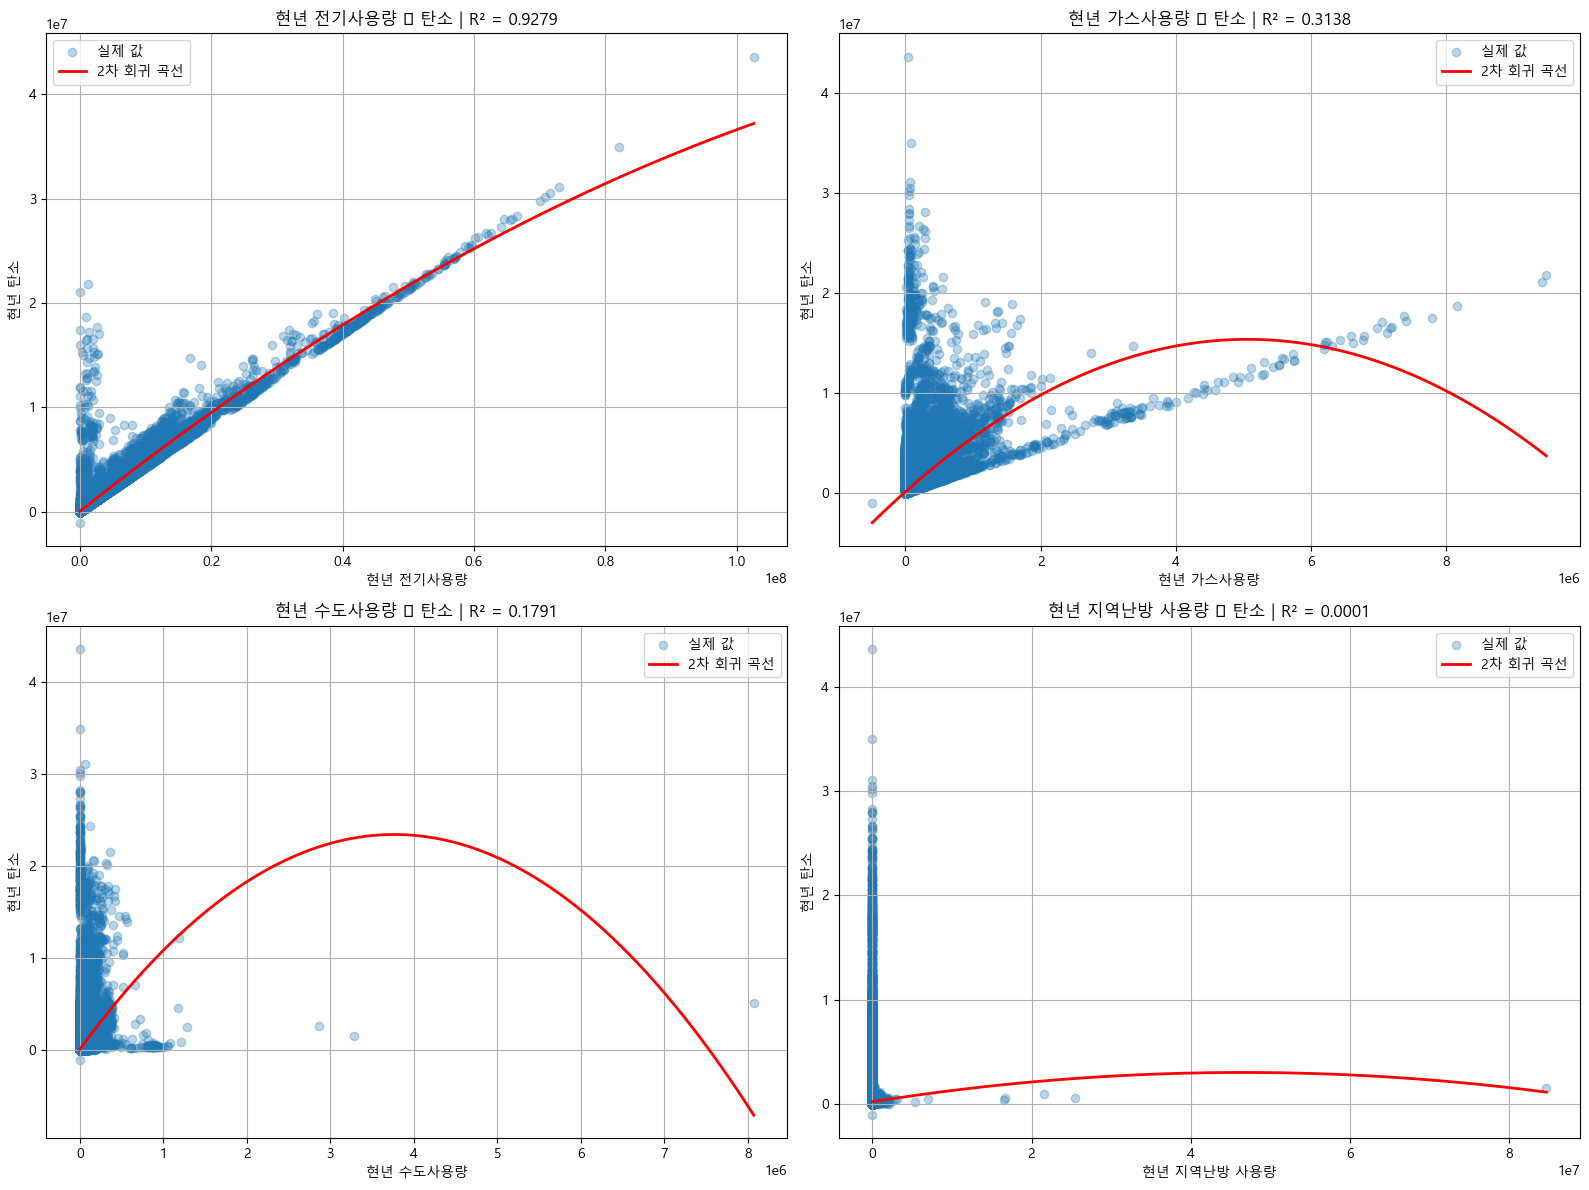

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 분석 대상 컬럼
features = ['현년 전기사용량', '현년 가스사용량', '현년 수도사용량', '현년 지역난방 사용량']
target = '현년 탄소'

# 한글 폰트 설정 (Windows)
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 전체 subplot 구성
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    # 데이터 정제
    X = df[[feature]].dropna()
    y = df.loc[X.index, target].dropna()
    X = X.loc[y.index]
    y = y.loc[X.index]

    # 다항 특성 생성
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    # 모델 학습
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    # 시각화용 값 생성
    x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(x_range_poly)

    # 시각화
    plt.subplot(2, 2, i)
    plt.scatter(X, y, alpha=0.3, label='실제 값')
    plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='2차 회귀 곡선')
    plt.xlabel(feature)
    plt.ylabel('현년 탄소')
    plt.title(f'{feature} ➝ 탄소 | R² = {r2:.4f}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
